# Exploring Test Results for Hamming Decoding
This file can be used to show different test results saved in the yaml files for the Quantum Hamming Decoding algorithm explained in our paper **"Quantum Channel Decoding"** as submitted to the [QEC-22 conference](https://qce.quantum.ieee.org/2022/).

Please refer to the readme file in the root of this repo for more information about setting up the environment, installing the required packages, and getting ready to run this notebook.

Copyright &copy; 2022 InterDigital AI Research Lab

In [1]:
import numpy as np
from hammingexp4 import *


Un-remark or edit the file names in the following cell to show the experiment information in the specified file.


File Version:         4
Decoding Algorithms:  No Coding   Quantum   Hard   Soft
Number of Blocks:     1000000
Number of Shots:      4096
Sigma2 fixed to:      0.5
Eb/No Values(db):     -4   -2   0   2   4   6   8
Simulators:           aer_simulator_statevector
Hamming (15,11) Times:
  Classical: 90520.79 Sec.
  Quantum: 140701.40 Sec.

FER for (15,11) Hamming Code, aer_simulator_statevector
Eb/No(db)  No Coding  Quantum    Hard       Soft       
-4         0.896712   0.835245   0.878444   0.835166   
-2         0.785437   0.656427   0.745249   0.656376   
0          0.592847   0.385035   0.518580   0.385033   
2          0.343357   0.128389   0.247438   0.128386   
4          0.129714   0.016960   0.062622   0.016960   
6          0.025730   0.000532   0.005946   0.000532   
8          0.001987   0.000003   0.000147   0.000003   


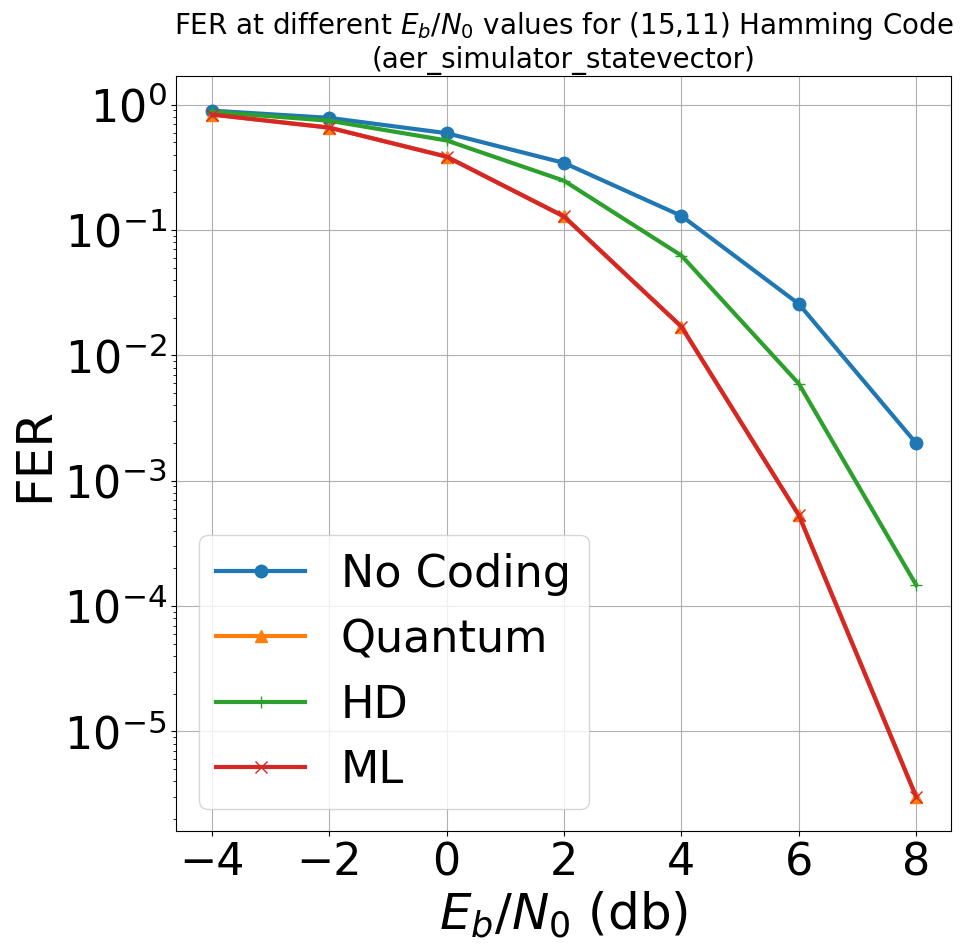

In [2]:
# exp = loadYaml("ExpFiles/NewHamming74.yml")  # Hamming Code (7,4)
exp = loadYaml("ExpFiles/NewHamming1511.yml")  # Hamming Code (15,11)

printResults(exp)
drawResults(exp)

The ``runExperiments`` function can be used to create new experiment files based on the specified configuration. You can play with the arguments to compare the performance of Quantum vs classical algorithms with different settings.

Hamming Decoding (7,4), Hard Decision ... Done (0.03 Sec.)
Hamming Decoding (7,4), Maximum Likelihood ... Done (0.02 Sec.)
Hamming Decoding (7,4), Quantum (aer_simulator) ... Done (0.73 Sec.)
Hamming Decoding (7,4), Quantum (FakeMontreal) ... Done (225.19 Sec.)
Hamming Decoding (15,11), Hard Decision ... Done (2.49 Sec.)
Hamming Decoding (15,11), Maximum Likelihood ... Done (2.47 Sec.)
Hamming Decoding (15,11), Quantum (aer_simulator) ... Done (4.77 Sec.)
Hamming Decoding (15,11), Quantum (FakeMontreal) ... Done (6775.47 Sec.)
Total Time: 7011.91 Sec.
Saving to 'ExpFiles/MyExp.yml'...Done.

File Version:         4
Decoding Algorithms:  Quantum   Hard   Soft
Number of Blocks:     100
Number of Shots:      1024
Sigma2 fixed to:      0.5
Eb/No Values(db):     -2   0   2   4
Simulators:           aer_simulator   FakeMontreal
Hamming (7,4) Times:
  Classical: 0.05 Sec.
  Quantum: 226.31 Sec.
Hamming (15,11) Times:
  Classical: 4.96 Sec.
  Quantum: 6780.59 Sec.

FER for (7,4) Hamming Code, a

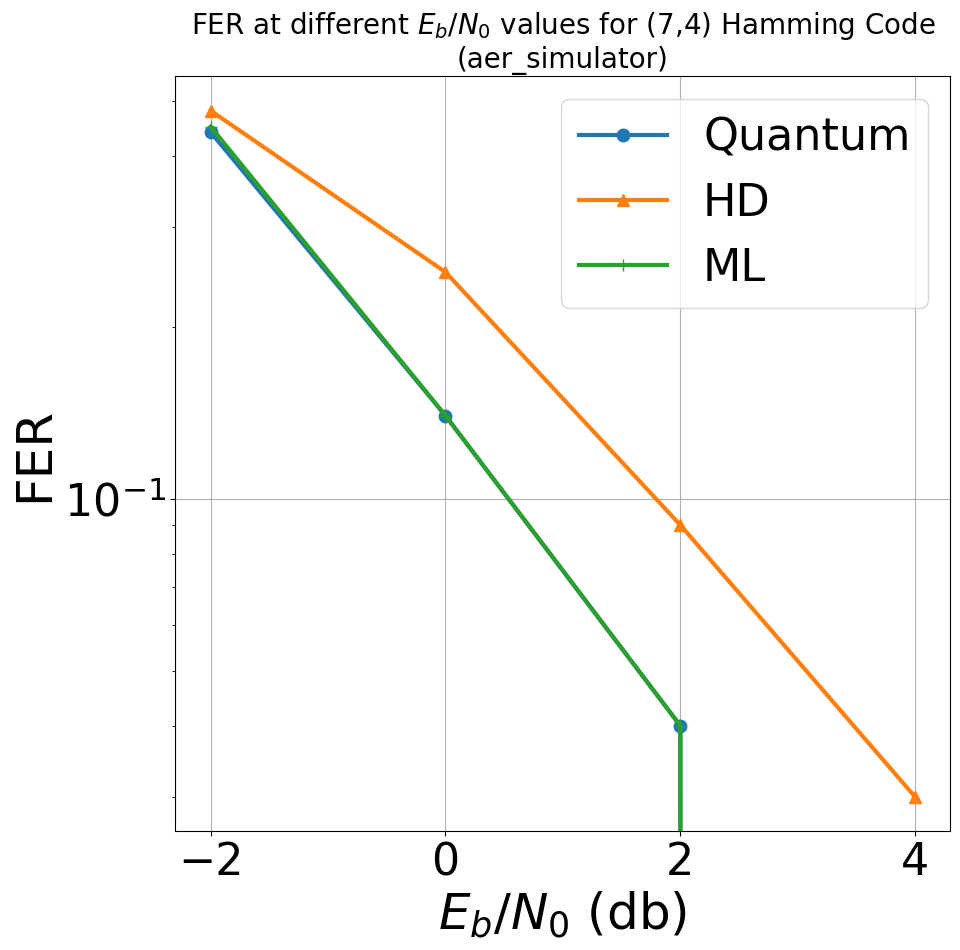

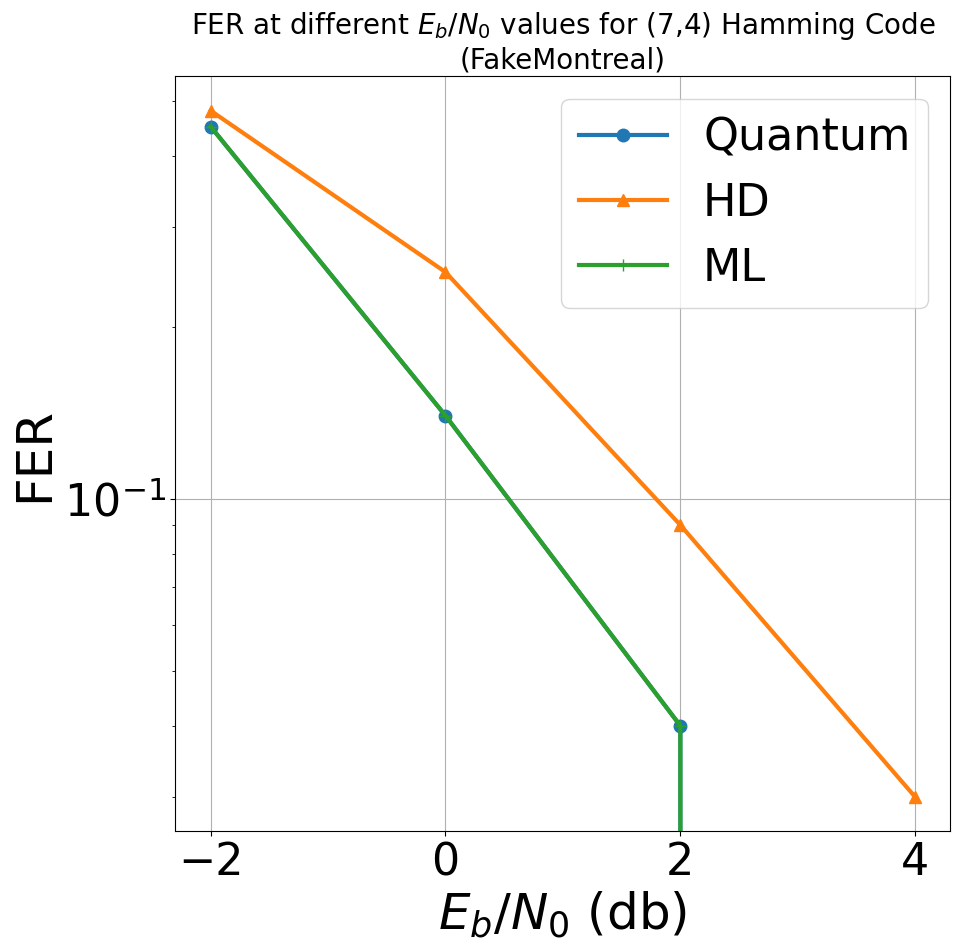

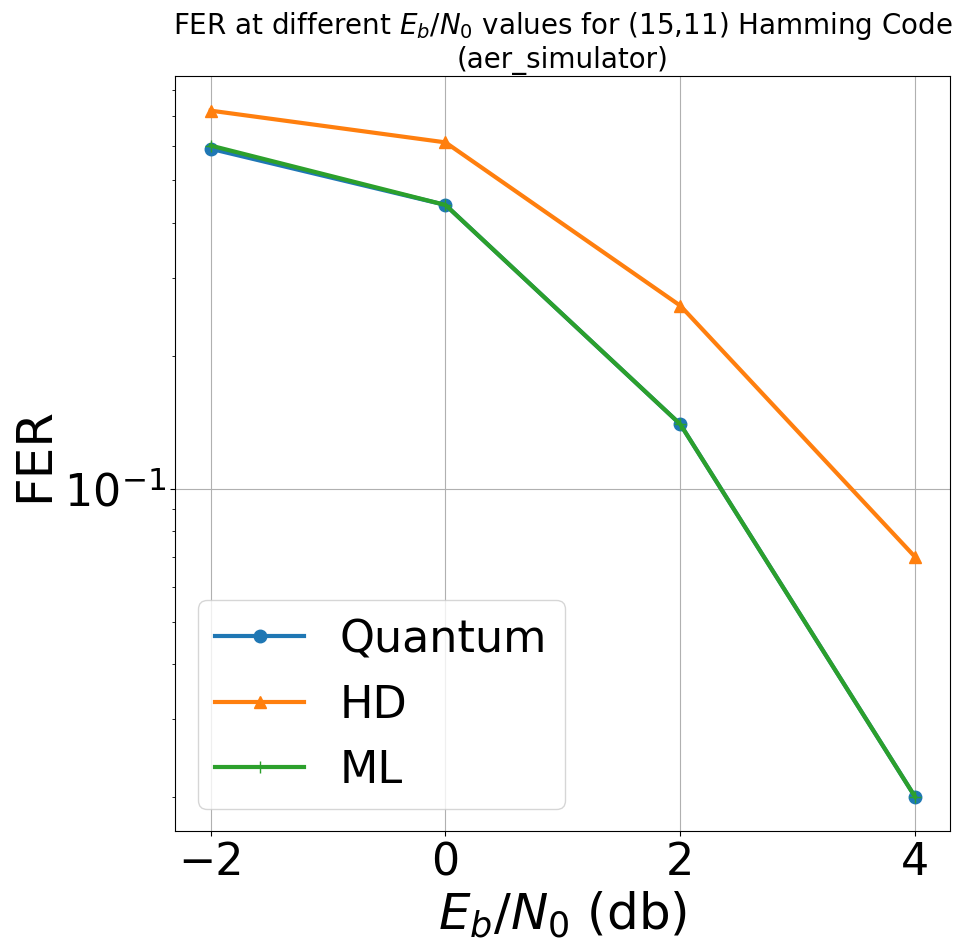

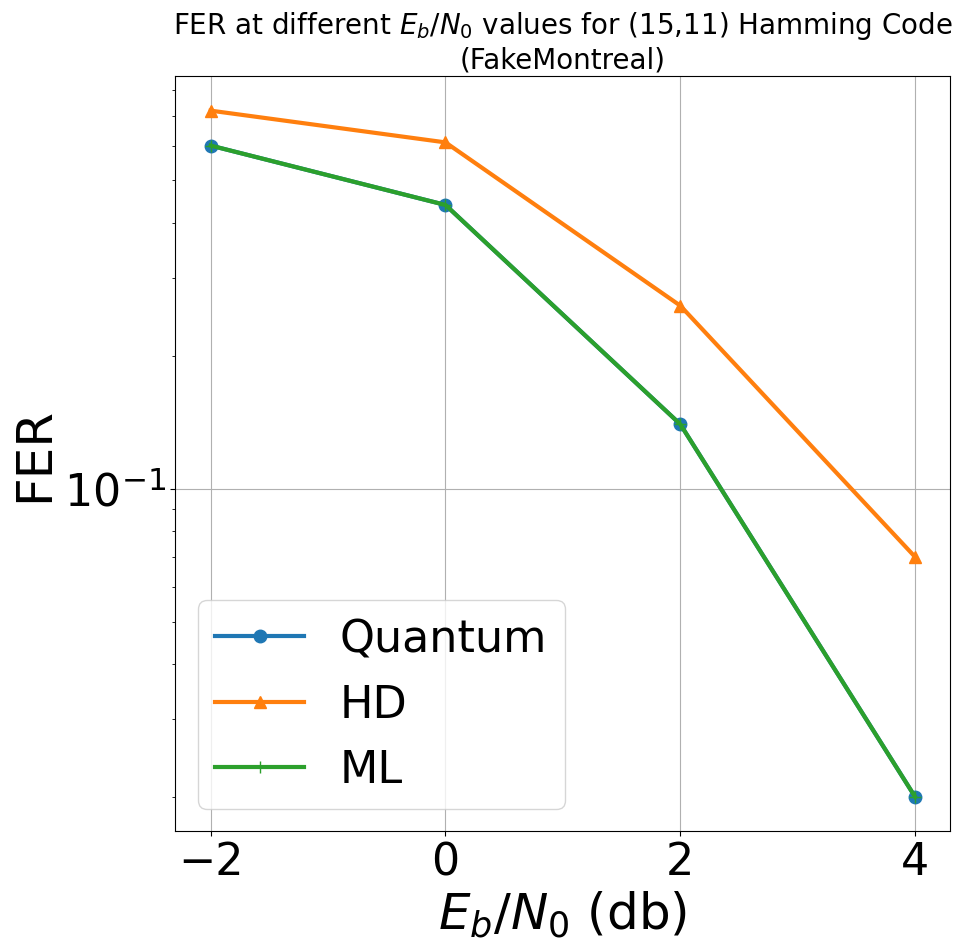

In [3]:
# Note: Depending on the configuration, this can take hours or days to complete.
exp = runExperiments("ExpFiles/MyExp.yml",
                     nBlocks = 100,                    # Number of times to repeat to calculate the error rates
                     nShots = 1024,                    # Number of shots for used to run the quantum circuit
                     codes = [[7,4], [15,11]],         # A list of Hamming codes to test
                     ebNoDbs = [-2, 0, 2, 4],          # A list of Eb/No values (in db)
                     decoders = ["Quantum", "Hard", "Soft"],          # A list of algorithms to test
                     simulators = ['aer_simulator', 'FakeMontreal'],  # Quantum simulators
                     sigma2 = 0.5)  # The fixed sigma value. (set to 'None' to use the actual value based on Eb/No)

printResults(exp)
drawResults(exp)